# Feed Forward Neural Network

## Goal :
in this project, our goal is to fill-in the gaps of a detaset with the help of predicting our datasets using skit-learn library.

## Description :
in this project, first we want to fill-in the empty cells using different metods such as fill them with mean number of other existing numbers in that column and then discuss about them. then we are going to find a function in our skit-learn library, to find the best model for our dataset, wich can estimate the target column by considering one of the features in .csv file, . also, we need to analyze wich of the features in the file, is the best feature to be used as a measure, in order to predict the output, wich is the movie genres prediction.

In [115]:
import cv2,os
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import random

In [73]:
all_images = []
all_labels = []
i = 0

labels = pd.DataFrame(pd.read_csv("labels.csv"))

list_dir=[int(file.split(".")[0]) for file in os.listdir("data")]
list_dir.sort()
for filename in list_dir:
    img = cv2.imread(os.path.join("data",str(filename)+".png"))
    img = img.flatten()
    all_images.append(img)
    i += 1
    if i%1000 == 0:
        print(i,"/10000 image prossesd!")   

        
cifar = labels.join(pd.DataFrame(all_images))

1000 /10000 image prossesd!
2000 /10000 image prossesd!
3000 /10000 image prossesd!
4000 /10000 image prossesd!
5000 /10000 image prossesd!
6000 /10000 image prossesd!
7000 /10000 image prossesd!
8000 /10000 image prossesd!
9000 /10000 image prossesd!
10000 /10000 image prossesd!


In [362]:
cifar

,id,label,0,1,2,3,4,5,6,7,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,8,horse,39,35,28,44,34,30,47,44,...,-124,100,-112,106,99,-114,104,96,-116,101
1,10,cat,116,125,125,91,101,110,83,90,...,-116,82,117,-113,84,116,-113,86,116,-112
2,12,horse,-104,-107,-114,-89,-84,-84,-102,-88,...,-91,105,124,-98,106,125,-98,111,125,-93
3,13,horse,-12,-41,-92,-16,-44,-94,-16,-44,...,122,108,-104,124,107,-102,124,100,-102,120
4,18,cat,97,104,110,118,-121,-114,120,-110,...,52,60,48,45,60,46,47,62,48,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,49979,horse,-106,-93,-92,56,82,94,77,102,...,-23,-22,-16,-27,-31,-27,-33,-2,-2,-2
9996,49980,cat,4,4,4,4,4,4,5,5,...,7,11,13,12,11,11,11,3,3,3
9997,49983,cat,41,41,41,37,39,39,36,39,...,81,44,56,80,44,56,82,45,59,85
9998,49984,cat,21,29,41,20,28,43,16,26,...,-17,-44,-40,-8,-34,-31,-4,-51,-48,-14


as we can seewe have flaten each of our images and now the numbers are between -128 to 127 wich when we call the train-test fynction they woud change to 0-255 and then for normalizaing we only have to devide it in 255.

5583
[ 67  60  49 ...  95 105 133]
horse


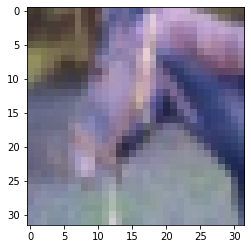

In [74]:
X_train, X_test, y_train, y_test = train_test_split(all_images, labels, test_size=0.2) 
y_train = np.array(y_train)
y_test = np.array(y_test)
rand_num = np.random.randint(len(X_train))
print(rand_num)
plt.imshow(X_train[rand_num].reshape(32,32,3))
print(X_train[rand_num])
print(y_train[rand_num][1])

horse
[105 156 147 ... 226 234 240]


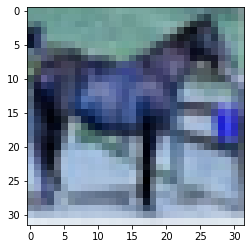

In [75]:
plt.imshow(X_train[0].reshape(32,32,3))
print(y_train[0][1])
print(X_train[0])    

cat
[102 101 113 ...  26  48  82]


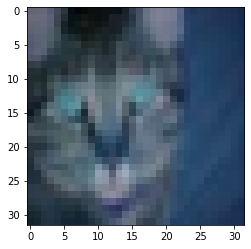

In [78]:
plt.imshow(X_train[5].reshape(32,32,3))
print(y_train[5][1])
print(X_train[5])  

### part 1-3:

cat: 4024
horse: 3976


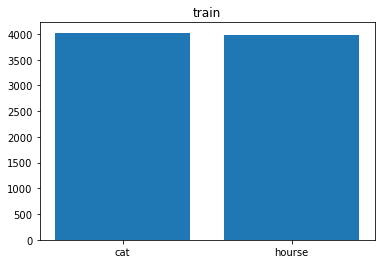

In [113]:
print("cat:",np.count_nonzero(y_train == "cat"))
print("horse:",np.count_nonzero(y_train == "horse"))
plt.bar(["cat","hourse"],[np.count_nonzero(y_train == "cat"), np.count_nonzero(y_train == "horse")])
plt.title("train");

cat: 976
horse: 1024


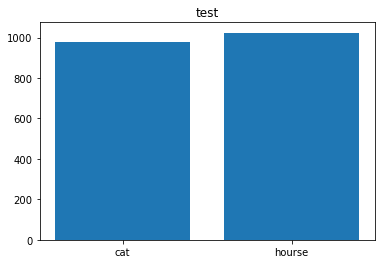

In [114]:
print("cat:",np.count_nonzero(y_test == "cat"))
print("horse:",np.count_nonzero(y_test == "horse"))
plt.bar(["cat","hourse"],[np.count_nonzero(y_test == "cat"), np.count_nonzero(y_test == "horse")])
plt.title("test");

### part 1-4:

In [83]:
print(X_train[0])
for i in range(len(X_train)):
    X_train[i] = X_train[i]/255
for i in range(len(X_test)):
    X_test[i] = X_test[i]/255
X_train[0]

[105 156 147 ... 226 234 240]


array([0.41176471, 0.61176471, 0.57647059, ..., 0.88627451, 0.91764706,
       0.94117647])

The reason for normalizing the images is to avoid the possibility of exploding gradients because of the high range of the pixels [0, 255], and improve the convergence speed. Therefore, you either standardize the each image, so that the range is [-1, 1] or you just divide the with the maximum pixel value as you are doing, so that the range of the pixels is in the [0, 1] range.

Another reason why you might want to normalize the image data is if you are using transfer learning. For example, if you are using a pre-trained model that has been trained with images with pixels in the [0, 1] range, you should make sure that the inputs you are providing the model are in the same range. Otherwise, your results will be messed up.

### part 2:

In [116]:
class Dataloader:
    
    def __init__(self, data, labels, n_classes, batch_size=None, shuffle=False):

        assert len(data)==len(labels)
        self.__n_classes = n_classes
        self.__batch_size = batch_size
        self.__shuffle = shuffle
        self.__data = data
        self.__onehot_labels = self.__onehot(labels, self.__n_classes)
    
    def __onehot(self, labels, n_classes):

        onehot_vectors = []
        onehot = dict()
        i = 0
        for label in labels:
            if label not in onehot:
                onehot[label] = np.zeros(n_classes)
                onehot[label][i] = 1
                i += 1
            onehot_vectors.append(onehot[label])   
            
        return onehot_vectors
    
    
    def __shuffle_dataset(self):

        shuffled_data = []
        shuffled_labels = []
        if self.__shuffle:
            shuffled_indx = random.sample(range(len(data)), len(data))
            for i in shuffled_indx:
                shuffled_data.append(self.__data[i])
                shuffled_labels.append(self.__onehot_labels[i])

            self.__data = shuffled_data
            self.__onehot_labels = shuffled_labels
    
    def __iter__(self):
        
        if self.__shuffle:
            self.__shuffle_dataset()
            
        if self.__batch_size==None:
            yield (np.matrix(self.__data), np.matrix(self.__onehot_labels))
            return
            
        for idx in range(0, len(self.__data), self.__batch_size):
            yield (np.matrix(self.__data[idx:idx+self.__batch_size]), 
                   np.matrix(self.__onehot_labels[idx:idx+self.__batch_size]))

In [117]:
class Identical:

    def __init__(self): pass
    
    def __val(self, matrix):
        identical_value = np.matrix(matrix, dtype=float)
        return identical_value

    def derivative(self, matrix):

        temp = np.matrix(matrix, dtype=float)
        identical_derivative = np.matrix(np.full(np.shape(temp), 1.))
        return identical_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)
    

class Relu:
    
    def __init__(self): pass
    
    def __val(self, matrix):

        relu_value = np.matrix.copy(matrix)
        row, col = np.shape(relu_value)
        for i in range(row):
            for j in range(col):
                if matrix[i,j] < 0 :
                    relu_value[i,j] = 0
        return relu_value

    def derivative(self, matrix):
        relu_derivative = np.matrix.copy(matrix)
        row, col = np.shape(relu_derivative)
        for i in range(row):
            for j in range(col):
                if matrix[i,j] < 0 :
                    relu_derivative[i,j] = 0
                else:
                    relu_derivative[i,j] = 1
        return relu_derivative
    
    def __call__(self, matrix):
        
        return self.__val(matrix)

    
class LeakyRelu:
    
    def __init__(self, negative_slope=0.01):
        
        self.negative_slope = 0.01
    
    def __val(self, matrix):
        leacky_relu_value = np.matrix.copy(matrix)
        row, col = np.shape(leacky_relu_value)
        for i in range(row):
            for j in range(col):
                if matrix[i,j] < 0 :
                    leacky_relu_value[i,j] = self.negative_slope*matrix[i,j]
        return leacky_relu_value

    def derivative(self, matrix):
        
        leacky_relu_derivative = np.matrix.copy(matrix)
        row, col = np.shape(leacky_relu_derivative)
        for i in range(row):
            for j in range(col):
                if matrix[i,j] < 0 :
                    leacky_relu_derivative[i,j] = self.negative_slope
                else:
                    leacky_relu_derivative[i,j] = 1
        return leacky_relu_derivative
    
    def __call__(self, matrix):
        
        return self.__val(matrix)

    
class Sigmoid:

    def __init__(self): pass

    def __val(self, matrix):
        
        sigmoid_value = np.matrix.copy(matrix)
        row, col = np.shape(sigmoid_value)
        for i in range(row):
            for j in range(col):
                sigmoid_value[i,j] = 1/(1+np.exp(-1*matrix[i,j]))
        return sigmoid_value

    def derivative(self, matrix):
        
        sigmoid_derivative = np.matrix.copy(matrix)
        row, col = np.shape(sigmoid_derivative)
        for i in range(row):
            for j in range(col):
                if matrix[i,j] < 0 :
                    leacky_relu_derivative[i,j] = (1/(1+np.exp(-1*matrix[i,j])))*(1-(1/(1+np.exp(-1*matrix[i,j]))))              
        return sigmoid_derivative
    
    def __call__(self, matrix):

        return self.__val(matrix)


class Softmax:
        
    def __init__(self): pass

    def __val(self, matrix):
        softmax_value = np.matrix.copy(matrix)
        row, col = np.shape(softmax_value)
        for j in range(col):
            denominator = sum(np.exp(matrix))[0,j]
            for i in range(row):
                softmax_value[i,j] = np.exp(matrix[i,j])/denominator
        return softmax_value
    
    def __call__(self, matrix):
        
        return self.__val(matrix)
    
class Tanh:
    
    def __init__(self): pass

    def __val(self, matrix):
        tanh_value = np.matrix.copy(matrix)
        row, col = np.shape(tanh_value)
        for i in range(row):
            for j in range(col):
                tanh_value[i,j] = np.tanh(matrix[i,j])
        return tanh_value

    def derivative(self, matrix):
        tanh_derivative = np.matrix.copy(matrix)
        row, col = np.shape(tanh_derivative)
        for i in range(row):
            for j in range(col):
                tanh_derivative[i,j] = 1/((np.cosh(matrix[i,j]))**2)
        return tanh_derivative
    
    def __call__(self, matrix):

        return self.__val(matrix)

In [118]:
class CrossEntropy:
    
    def __init__(self): pass

    def __val(self, true_val, expected_val):

        assert np.shape(true_val)==np.shape(expected_val)
        cross_entropy_value = 0
        for i in range(len(true_val)):
            cross_entropy_value += expected_val[i]*np.log(true_val[i])
            
        return cross_entropy_value
    
    def derivative(self, true_val, expected_val):
        
        assert np.shape(true_val)==np.shape(expected_val)
        cross_entropy_derivative = []
        for i in range(len(true_val)):
            cross_entropy_derivative[i] = expected_val[i]/true_val[i]
        return cross_entropy_derivative
    
    def __call__(self, true_val, expected_val):

        return self.__val(true_val, expected_val)

In [119]:
class Layer:

    DEFAULT_LOW, DEFAULT_HIGH, DEFAULT_MEAN, weights = 0, 0.05, 0., 1.
  
    def __init__(self, input_size, output_size, activation=Identical(), initial_weight='uniform', 
                 **initializing_parameters):
        
        assert type(initial_weight)==str, 'Undefined activation function!'
        
        self.__weight_initializer_dict = {'uniform':self.__uniform_weight, 'normal':self.__normal_weight}
        
        assert initial_weight in self.__weight_initializer_dict, 'Undefined weight initialization function!'


        self.__n_neurons = output_size
        weight_initializer = self.__weight_initializer_dict[initial_weight]
        self.__weight = weight_initializer(input_size, self.__n_neurons, **initializing_parameters)
        self.__bias = weight_initializer(1, self.__n_neurons, **initializing_parameters)
        self.__activation = activation
        
        self.__last_input = None
        self.__last_activation_input = None
        self.__last_activation_output = None
        self.__last_activation_derivative = None
        
    def forward(self, layer_input):
        
        assert np.ndim(layer_input)==2
        assert np.size(self.__weight,0) == np.size(layer_input,1)
        
        
        
        self.__last_input = layer_input
        self.__last_activation_input = activation(self.__last_input)
        self.__last_activation_derivative = activation.derivative(self.__last_activation_input)
        
        
        for k in range(len(self.__n_neurons)):
            self.__last_activation_output[k] = self.__bias
            for i in range(len(input_size)):
                self.__last_activation_output[k] += self.__last_input[i,0]*self.__weight[i,k]
        
        self.__last_activation_output = activation(self.__last_activation_output)   
        return self.__last_activation_output
    
    def update_weights(self, backprop_tensor, lr):

        assert np.ndim(backprop_tensor)==2
        assert np.size(backprop_tensor,0) == np.size(self.__last_activation_derivative,0)
        assert np.size(backprop_tensor,1) == self.__n_neurons

        tensor_out = np.matmul(backprop_tensor, np.matrix.transpose(self.__weight))       
        self.__weight = self.__weight - lr*np.matmul(np.matrix.transpose(self.__last_input),backprop_tensor)
        backprop_tensor = tensor_out
        
        return backprop_tensor
    

    def __uniform_weight(self, dim1, dim2, **initializing_parameters):

        low, high = self.DEFAULT_LOW, self.DEFAULT_HIGH
        if 'low' in initializing_parameters.keys(): low = initializing_parameters['low']
        if 'high' in initializing_parameters.keys(): high = initializing_parameters['high']
        
        weights = np.random.uniform(low, high, size=(dim1, dim2))
        
        return weights

    def __normal_weight(self, dim1, dim2, **initializing_parameters):

        mean, var = self.DEFAULT_MEAN, self.DEFAULT_VAR
        if 'mean' in initializing_parameters.keys(): mean = initializing_parameters['mean']
        if 'var' in initializing_parameters.keys(): var = initializing_parameters['var']
        
        weights = np.random.normal(mean, np.sqrt(var), size=(dim1, dim2))
        
        return weights
    
    @property
    def n_neurons(self): return self.__n_neurons
    
    @property
    def weight(self): return self.__weight
    
    @property
    def bias(self): return self.__bias
    
    @property
    def activation(self): return self.__activation

In [120]:
class FeedForwardNN:

    def __init__(self, input_shape):
        
        self.__input_shape = input_shape
        self.__output_shape = None
        
        self.__layers_list = []
        
        self.__lr = None
        self.__loss = None

        
    def add_layer(self, n_neurons, activation=Relu(), initial_weight='uniform', **initializing_parameters):
         
        assert type(n_neurons)==int, "Invalid number of neurons for the layer!"
        assert n_neurons>0, "Invalid number of neurons for the layer!"
        
        n_prev_neurons = self.__input_shape if len(self.__layers_list)==0 else self.__layers_list[-1].n_neurons
        new_layer = Layer(n_prev_neurons, n_neurons, activation, initial_weight, **initializing_parameters)
        self.__layers_list.append(new_layer)
        self.__output_shape = self.__layers_list[-1].n_neurons 
      
    
    def set_training_param(self, loss=CrossEntropy(), lr=1e-3):
        
        assert self.__layers_list, "Uncomplete model!"
        self.__loss = loss
        self.__lr = lr
    
    
    def forward(self, network_input):
        
        assert type(self.__output_shape) != None, "Model is not compiled!"
                
        for i in range(len(self.__layers_list)):
                network_input = self.__layers_list[i].forward(network_input)
        
        network_output = network_input
        return network_output
    
    
    def fit(self, epochs, trainloader, testloader=None, print_results=True):
        
        assert type(self.__output_shape) != None, "Model is not compiled!"
        assert type(self.__lr) != None and type(self.__loss) != None, "Training paramenters are not set!"

        log = {"train_accuracy":[], "train_loss":[], "test_accuracy":[], "test_loss":[]}
        
        for epoch in range(1, epochs+1):
            
            if print_results: 
                print('Epoch {}:'.format(epoch)) 
                
            average_accuracy, average_loss = self.__train(trainloader)
            log['train_accuracy'].append(average_accuracy)
            log['train_loss'].append(average_loss)
            if print_results:
                print('\tTrain: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))
            
            if type(testloader) != type(None):
                average_accuracy, average_loss = self.__test(testloader)
                log['test_accuracy'].append(average_accuracy)
                log['test_loss'].append(average_loss)
                if print_results:
                    print('\tTest: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))
                    
        return log
  
    
    def __train(self, trainloader):

        bach_accuracies, batch_losses = [], []
        for x_train, y_train in trainloader:
            batch_accuracy, batch_loss = self.__train_on_batch(x_train, y_train)
            bach_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        return np.mean(bach_accuracies), np.mean(batch_losses)
    
    
    def __test(self, testloader):

        bach_accuracies, batch_losses = [], []
        for x_test, y_test in testloader:
            batch_accuracy, batch_loss = self.__test_on_batch(x_test, y_test)
            bach_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        return np.mean(bach_accuracies), np.mean(batch_losses)
   
    def __train_on_batch(self, x_batch, y_batch):
        
        lossdev = 1
        while lossdev != 0:
            network_output = self.forward(self, network_input)
            lossdev = self.__loss.__val(network_output, y_batch)
            self.__update_weights(lossdev,y_batch)
            
        batch_accuracy = self.__compute_accuracy()
        batch_average_loss = lossdev
        
        return (batch_accuracy, batch_average_loss)
        
        
    def __test_on_batch(self, x_batch, y_batch):
        
        lossdev = 1
        while lossdev != 0 :
            network_output = self.forward(self, network_input)
            lossdev = self.__loss.__val(network_output, y_batch)
            self.__update_weights(lossdev,y_batch)
            
        batch_accuracy = self.__compute_accuracy()
        batch_average_loss = lossdev
        return (batch_accuracy, batch_average_loss)
            
        
    def __get_labels(self, outputs):

        labels = []
        for i in range(len(outputs)):
            val, indx
            labels.append()
        return labels
    
    
    def __compute_accuracy(self, output, expected_output):

        accuracy = 0
        labels = self.__get_labels(output)
        for i in range(len(labels)):
            if labels[i] == expected_output[i]:
                accuracy += 1
        accuracy = (accuracy/len(labels))*100
    
    
    def __update_weights(self, output, y_train):

        for i in range(len(self.__layers_list)):
                output = self.__layers_list[i].__update_weights(output)
        
        network_output = network_input

        return

Zero initialization causes the neuron to memorize the same functions almost in each iteration
If all the weights are initialized to zeros, the derivatives will remain same for every w in W[l]. As a result, neurons will 
learn same features in each iteration. This problem is known as network failing to break symmetry. And not only zero, 
any constant initialization will produce a poor result .
Random initialization is generally used to break the symmetry and this process gives much better accuracy than zero 
initialization. It prevents neuron from learning the same features of its inputs. Remember, neural network is very 
sensitive and prone to overfitting as it quickly memorizes the training data. But our goal is to make each neuron learns 
different functions of its input. Now a new problem may arise if the weights initialized randomly can be very high or very 
low

In [ ]:
BATCH_SIZE=32
INPUT_SHAPE = 1024 
LEARNING_RATE = 0.001
EPOCHS = 15

TRAINLOADER = Dataloader(data =X_train, labels = y_train, n_classes = 20, batch_size = BATCH_SIZE, shuffle = False)
TESTLOADER = Dataloader(data = X_train, labels = y_train, n_classes = 20, batch_size = BATCH_SIZE, shuffle = False)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(n_neurons =20 , activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(n_neurons =20 , activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(n_neurons = 2, activation = Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

Combining ReLU, the hyper-parameterized1 leaky variant, and variant with dynamic parametrization during learning confuses two distinct things:
The comparison between ReLU with the leaky variant is closely related to whether there is a need, in the particular ML case at hand, to avoid saturation — Saturation is thee loss of signal to either zero gradient2 or the dominance of chaotic noise arising from digital rounding3.
The comparison between training-dynamic activation (called parametric in the literature) and training-static activation must be based on whether the non-linear or non-smooth characteristics of activation have any value related to the rate of convergence4.
The reason ReLU is never parametric is that to make it so would be redundant. In the negative domain, it is the constant 

In [ ]:
LEARNING_RATE = 0.0000001
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

zero. In the non-negative domain, its derivative is constant. Since the activation input vector is already attenuated with a vector-matrix product (where the matrix, cube, or hyper-cube contains the attenuation parameters) there is no useful purpose in adding a parameter to vary the constant derivative for the non-negative domain.

When there is curvature in the activation, it is no longer true that all the coefficients of activation are redundant as parameters. Their values may considerably alter the training process and thus the speed and reliability of convergence.

For substantially deep networks, the redundancy reemerges, and there is evidence of this, both in theory and practice in the literature.

In [ ]:
LEARNING_RATE = 0.1
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

In [ ]:
BATCH_SIZE=64
INPUT_SHAPE = 1024 
LEARNING_RATE = 0.001
EPOCHS = 15

TRAINLOADER = Dataloader(data = X_train, labels =  y_train, n_classes = 20, batch_size = BATCH_SIZE, shuffle = False)
TESTLOADER = Dataloader(data = X_train), labels =  y_train, n_classes = 20, batch_size = BATCH_SIZE, shuffle = False)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(n_neurons =20 , activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(n_neurons =20 , activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(n_neurons = 2, activation = Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

The learning rate controls how quickly the model is adapted to the problem. Smaller learning rates require more training epochs given the smaller changes made to the weights each update, whereas larger learning rates result in rapid changes and require fewer training epochs.

A learning rate that is too large can cause the model to converge too quickly to a suboptimal solution, whereas a learning rate that is too small can cause the process to get stuck.

The challenge of training deep learning neural networks involves carefully selecting the learning rate. It may be the most important hyperparameter for the model.

## Refrences:

[1] https://stackoverflow.com/questions/36967920/numpy-flatten-rgb-image-array

[2] https://stackoverflow.com/questions/62742125/read-images-from-from-the-folder-in-the-same-order-in-which-they-appears-and-sto

[3] https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/

[4] https://www.geeksforgeeks.org/image-classifier-using-cnn/

[5] https://careerkarma.com/blog/python-add-to-dictionary/#:~:text=There%20is%20no%20add()%20%2C%20append()%20%2C%20or%20insert(),assigning%20it%20a%20particular%20value.

[6] https://jamesmccaffrey.wordpress.com/2019/09/23/neural-network-back-propagation-weight-update-equation-mean-squared-error-vs-cross-entropy-error/